In [1]:
import numpy as np
import scipy.linalg as LA 
import matplotlib.pyplot as plt
# 1. load data
data_dir = '../ml_data/'
img_dir = '../images/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')

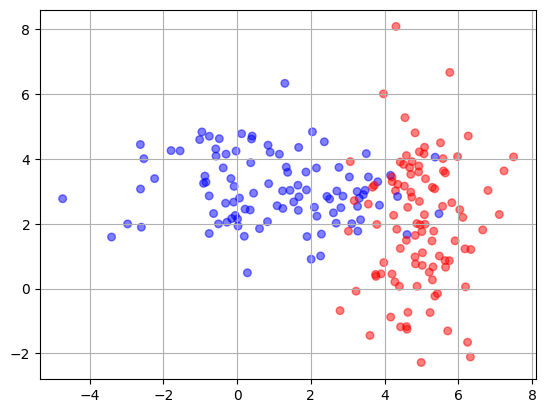

In [2]:
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s,  marker = 'o', alpha = 0.5)
plt.grid(True) 
# plt.savefig(”../ImgOut/la3.eps”, format='eps') 
plt.show()

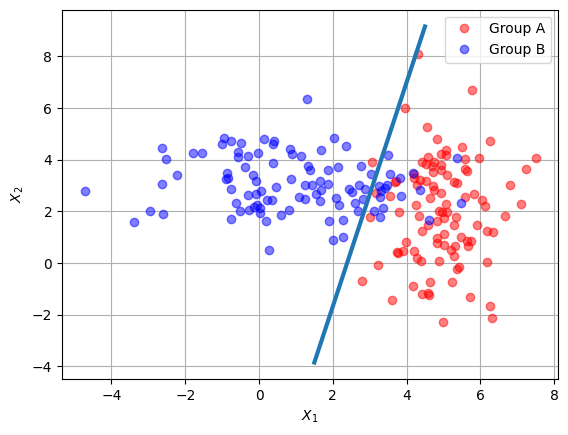

In [3]:
Idx = (D[:,2]==0)#要的向量
plt.plot(D[Idx, 0], D[Idx, 1], 'ro',\
alpha = 0.5, label = 'Group A')#把座標軸畫出來
Idx = (D[:,2]==1) 
plt.plot(D[Idx,0], D[Idx,1],'bo', \
alpha = 0.5, label = 'Group B')
plt.legend(),
plt.grid(True) 
plt.xlabel('$X_1$'),
plt.ylabel('$X_2$')
n = len(D[:, 0])
#X = np.hstack((np.ones((n, 1)), D[:, 0:2])) 
X = np.c_[np.ones(n),D[:,0:2]]
y = D[:, 2]
b = LA.inv(X.T @ X) @ X.T @ y.T
# Draw a linear regression line
x = np.array([1.5, 4.5])
y = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y, lw=3) 
plt.show()

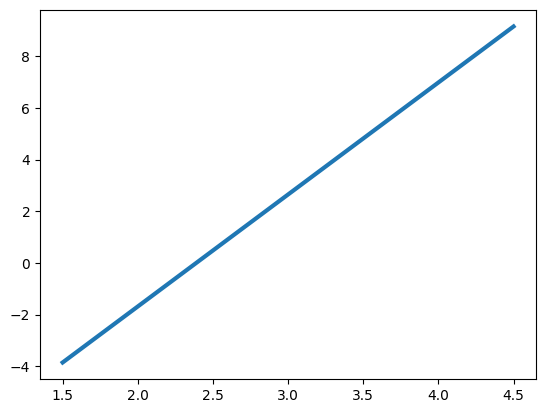

In [17]:
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2])) 
y = D[:, 2]
b = LA.inv(X.T @ X) @ X.T @ y.T
# Draw a linear regression line
x = np.array([1.5, 4.5])
y = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y, lw=3) 
plt.show()

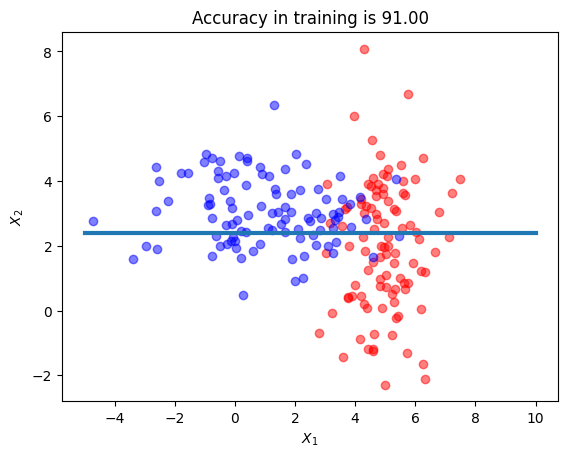

In [25]:
from sklearn.linear_model import LinearRegression
Idx = (D[:,2]==0)#要的向量
plt.plot(D[Idx, 0], D[Idx, 1], 'ro',\
alpha = 0.5, label = 'Group A')#把座標軸畫出來
Idx = (D[:,2]==1) 
plt.plot(D[Idx,0], D[Idx,1],'bo', \
alpha = 0.5, label = 'Group B')
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
y = D[:, 2]
b = LA.inv(X.T @ X) @ X.T @ y.T
# Linear Regression by sklearn
Mdl = LinearRegression()  # 建 立 新 的 linear regression model
Mdl.fit(X, y)  # 進行估計 ( 配適 )
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_  # 估 計 結 果 :beta0
coeffs = Mdl.coef_  # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
x = np.array([-5, 10])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X)  # 預測或計算擬合值
y_pre = [1 if i > 0.5 else 0 for i in y_hat]  # 群組判讀
plt.title("Accuracy in training is {:.2f}".format(100 * np.mean(y_pre == y)))
plt.xlabel("$X_1$"),
plt.ylabel("$X_2$")
plt.show()


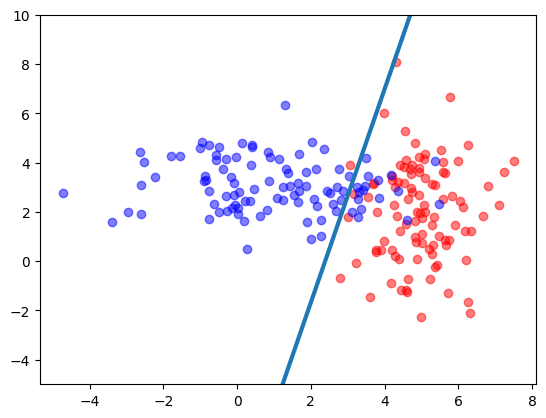

In [29]:
Idx = (D[:,2]==0)#要的向量
plt.plot(D[Idx, 0], D[Idx, 1], 'ro',\
alpha = 0.5, label = 'Group A')#把座標軸畫出來
Idx = (D[:,2]==1) 
plt.plot(D[Idx,0], D[Idx,1],'bo', \
alpha = 0.5, label = 'Group B')
n = len(D[:, 0])
X = D[:,0:2]
y = D[:, 2]
b = LA.inv(X.T @ X) @ X.T @ y.T
# Linear Regression by sklearn
Mdl = LinearRegression()  # 建 立 新 的 linear regression model
Mdl.fit(X, y)  # 進行估計 ( 配適 )
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_  # 估 計 結 果 :beta0
coeffs = Mdl.coef_  # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.ylim(-5,10)
plt.plot(x, f, lw=3)

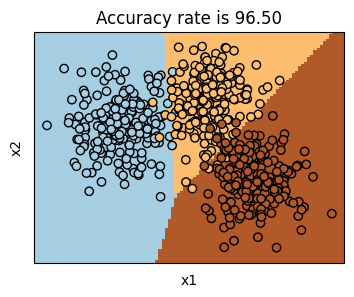

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
D1=np.loadtxt(data_dir+'/logistic.txt',comments='#')
X = D1[:, :2]  # we only take the first two features.
Y = D1[:,2]

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="x1",
    ylabel="x2",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
score=logreg.score(X,Y)
plt.title('Accuracy rate is {:.2f}'.format(score*100) )

plt.xticks(())
plt.yticks(())
plt.savefig(img_dir+'logistic.pdf', format='pdf')
plt.show()